<a href="https://colab.research.google.com/github/Ramon-Goveia/DataScience/blob/master/AnaliseDeManutencaoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia do modelo: 0.53


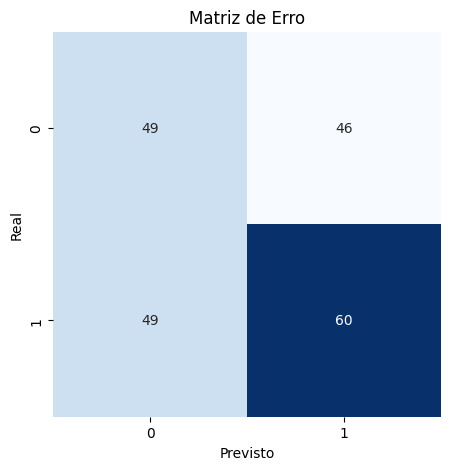

<Figure size 1200x800 with 0 Axes>

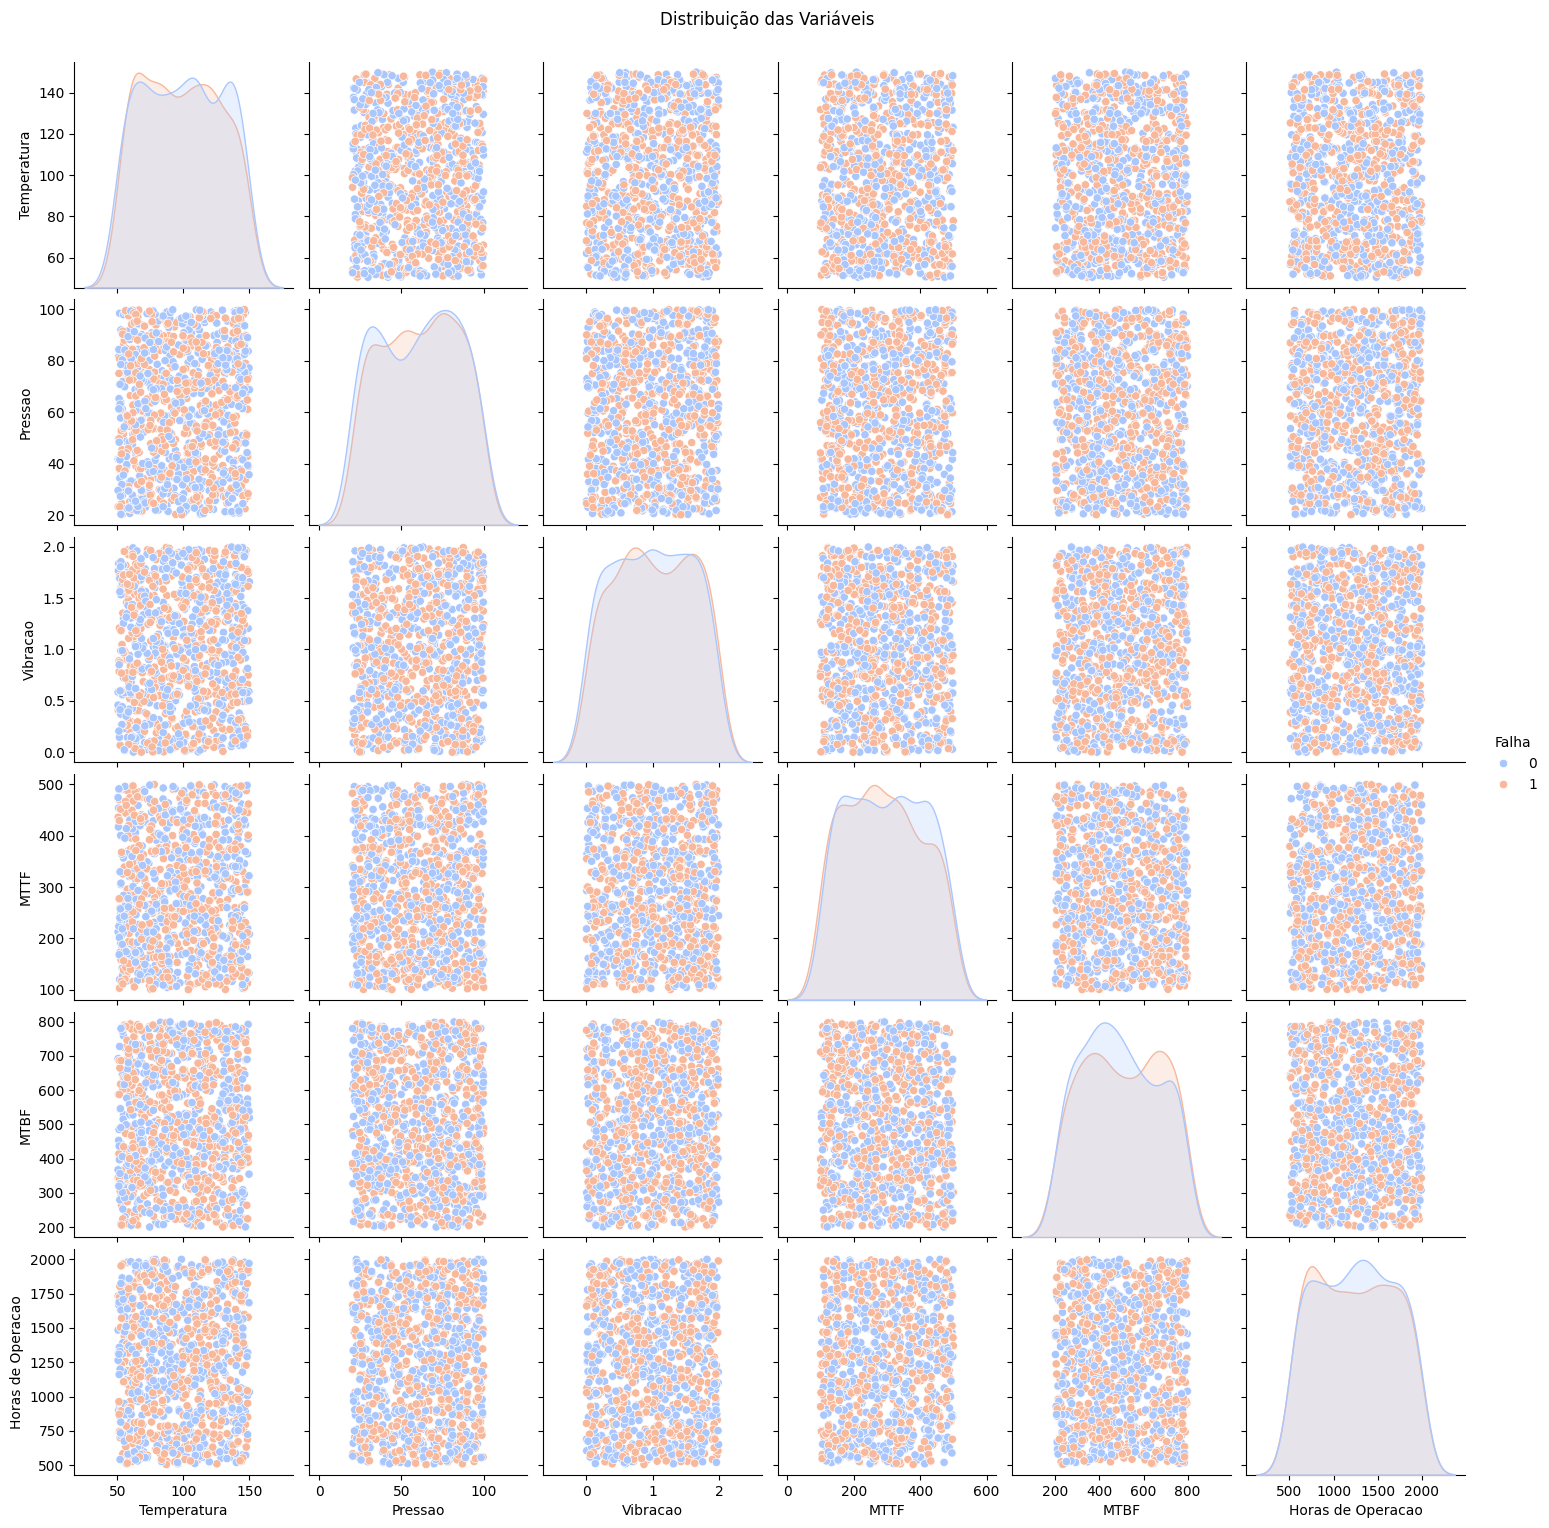

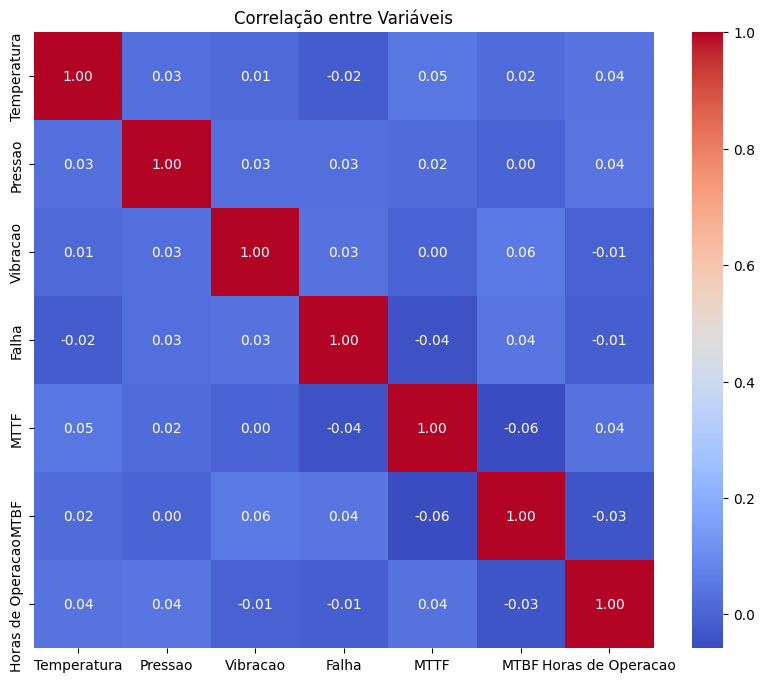

In [3]:
# Instalando bibliotecas necessárias
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

# Importando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Gerando dados de manutenção de máquinas
np.random.seed(42)

# Criando um DataFrame fictício com dados de manutenção
data = {
    'Temperatura': np.random.uniform(low=50, high=150, size=1000),
    'Pressao': np.random.uniform(low=20, high=100, size=1000),
    'Vibracao': np.random.uniform(low=0, high=2, size=1000),
    'Falha': np.random.choice([0, 1], size=1000),
    'MTTF': np.random.uniform(low=100, high=500, size=1000),
    'MTBF': np.random.uniform(low=200, high=800, size=1000),
    'Horas de Operacao': np.random.uniform(low=500, high=2000, size=1000)
}

df = pd.DataFrame(data)

# Dividindo os dados em conjuntos de treino e teste
X = df.drop('Falha', axis=1)
y = df['Falha']

# Tratamento de Dados Desbalanceados (exemplo utilizando RandomOverSampler)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Escalonando as variáveis
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Treinando um modelo de Machine Learning (Random Forest) com dados balanceados
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Ajustar os hiperparâmetros conforme necessário
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Visualizando a matriz de erro
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Erro')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Visualizando a distribuição das variáveis
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Falha', palette='coolwarm')
plt.suptitle('Distribuição das Variáveis', y=1.02)
plt.show()

# Visualizando a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.show()